In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#pip install pydot

In [3]:
#pip install tensorflow==2.7.0

In [4]:
# This line of code loads the MNIST dataset,providing training and test images
(x_train_digit,y_train_digit),(x_test_digit,y_test_digit)=mnist.load_data()

In [5]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [6]:
y_test_digit[3]

0

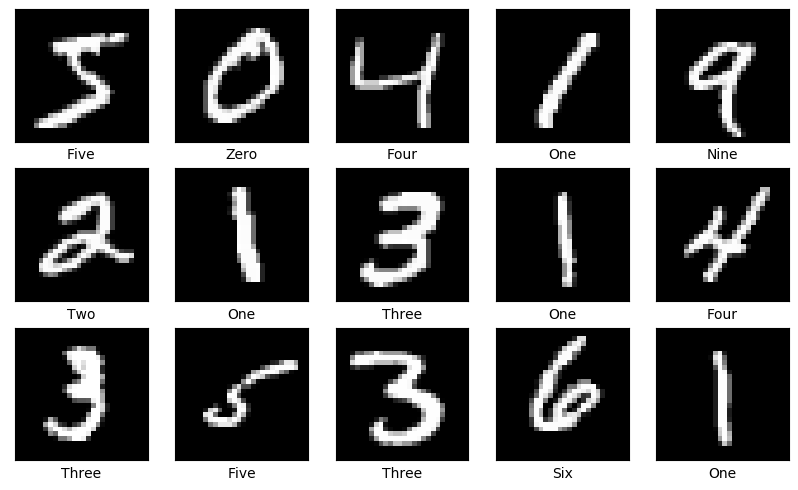

In [7]:
# This code generates a 5*5 grid of images from a mnist datasets training set and disply the labels.
# Matplotlib code for visualization and each subplot in the grid displays a grayscale image.  
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i],cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [8]:
# Its 3D format of the training image
x_train_digit.shape

(60000, 28, 28)

In [9]:
# Reshapes the original 2D format of the training images into a flattend format with 784 elements for each image.
x_train_digit=x_train_digit.reshape(60000,784)
x_test_digit=x_test_digit.reshape(10000,784)

In [10]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
# Its convert the class labels in the mnist dataset from their original integer format to one hot encoded format
y_train_digit=to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [12]:
y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
#Neural network model using keras in deep learning library.Models represents a feedforward neural network for a classification task and complie this model specify a loss function and train it using the training data and labels
model=keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [14]:
#Provides easiar to understand overview of models structure and number of parameter in your neural network.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Your model is configured to use categorical crossentropy as the loss function, the Adam optimizer for weight updates, and accuracy as the evaluation metric.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
#Your model will be trained over 10 epochs using the specified batch size and will be evaluated on the validation data.The history object will contain the training and validation loss and accuracy values at each epoch.
history=model.fit(x_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(x_test_digit,y_test_digit))

Epoch 1/10
600/600 [==============================] - 6s 8ms/step - loss: 1.6197 - accuracy: 0.8538 - val_loss: 0.3494 - val_accuracy: 0.9204
Epoch 2/10
600/600 [==============================] - 5s 8ms/step - loss: 0.2587 - accuracy: 0.9359 - val_loss: 0.2237 - val_accuracy: 0.9450
Epoch 3/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1729 - accuracy: 0.9524 - val_loss: 0.2126 - val_accuracy: 0.9456
Epoch 4/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1396 - accuracy: 0.9613 - val_loss: 0.2091 - val_accuracy: 0.9501
Epoch 5/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1200 - accuracy: 0.9660 - val_loss: 0.1711 - val_accuracy: 0.9576
Epoch 6/10
600/600 [==============================] - 5s 8ms/step - loss: 0.1126 - accuracy: 0.9682 - val_loss: 0.1899 - val_accuracy: 0.9561
Epoch 7/10
600/600 [==============================] - 5s 8ms/step - loss: 0.0966 - accuracy: 0.9717 - val_loss: 0.1906 - val_accuracy: 0.9531
Epoch 

In [17]:
# By evaluating our model on the test dataset values.it provide insights into the models performance on the test set.
test_loss_digit,test_acc_digit=model.evaluate(x_test_digit,y_test_digit)

313/313 [==============================] - 2s 4ms/step - loss: 0.1503 - accuracy: 0.9666


In [18]:
print('Digit MNIST Test accuracy:',round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.9666


In [19]:
y_predict=model.predict(x_test_digit)

In [20]:
y_predict

array([[2.6125876e-10, 6.6003203e-04, 6.5042758e-01, ..., 1.0000000e+00,
        8.5001929e-08, 7.7455044e-03],
       [3.7188368e-09, 6.2671578e-12, 1.0000000e+00, ..., 7.8921963e-05,
        8.7606011e-09, 2.0216187e-13],
       [9.4472054e-13, 9.9999130e-01, 7.8078067e-08, ..., 1.8868324e-05,
        4.9680326e-05, 2.7147054e-16],
       ...,
       [6.2090755e-02, 3.6680716e-01, 1.2963860e-06, ..., 9.9656868e-01,
        2.1655460e-06, 5.1578397e-01],
       [9.9931359e-01, 4.4945667e-10, 9.4906062e-01, ..., 9.8586488e-01,
        9.9999440e-01, 5.1423573e-01],
       [4.0470481e-02, 2.7566338e-01, 2.7660601e-05, ..., 1.7225051e-05,
        3.3027226e-01, 3.5148293e-01]], dtype=float32)

In [21]:
#The models performance in terms of classifying the test data to calculate metrics such as accuracy, precision, recall, and F1 score to evaluate the models classification performance.
y_predicts=np.argmax(y_predict,axis=1)
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [22]:
y_predicts[0]

7

In [23]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [24]:
# Export the DataFrame to different file formats generate summary statistics or visualizations on the predictions if needed.
y_pre=pd.DataFrame(y_predicts)

In [25]:
y_pre

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [26]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

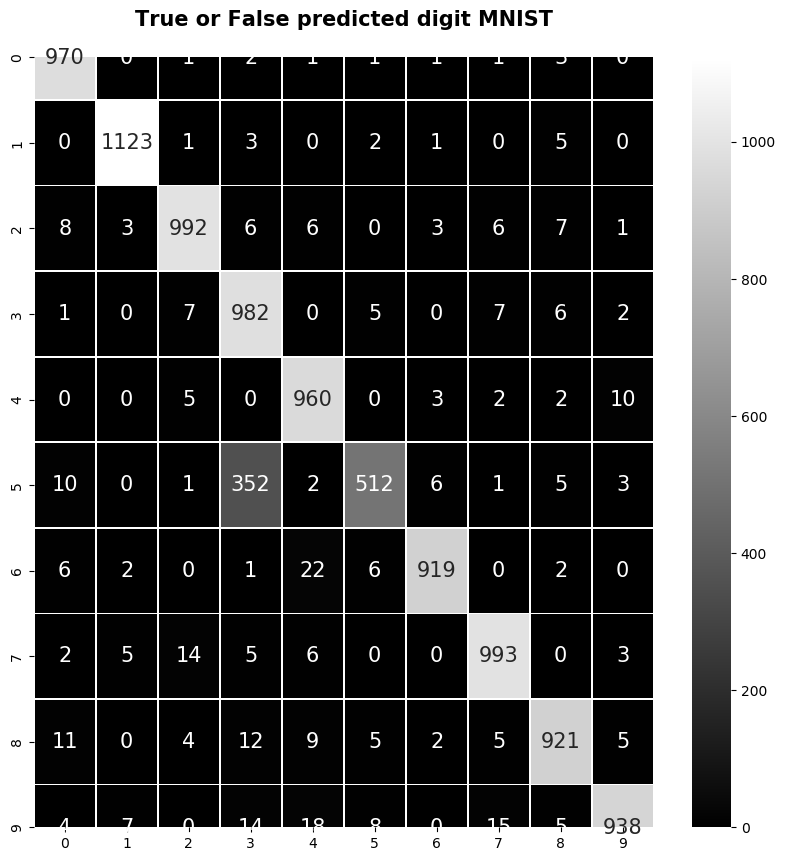

In [27]:
# A confusion matrix is a useful tool for evaluating the performance of a classification model. 
#Heatmap that helps you assess how well your model is performing and it providing a visual representation of predictions for each class in the MNIST dataset.
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt='d',cmap='gray')
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.96      1032
           3       0.71      0.97      0.82      1010
           4       0.94      0.98      0.96       982
           5       0.95      0.57      0.72       892
           6       0.98      0.96      0.97       958
           7       0.96      0.97      0.97      1028
           8       0.96      0.95      0.95       974
           9       0.98      0.93      0.95      1009

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000



In [29]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


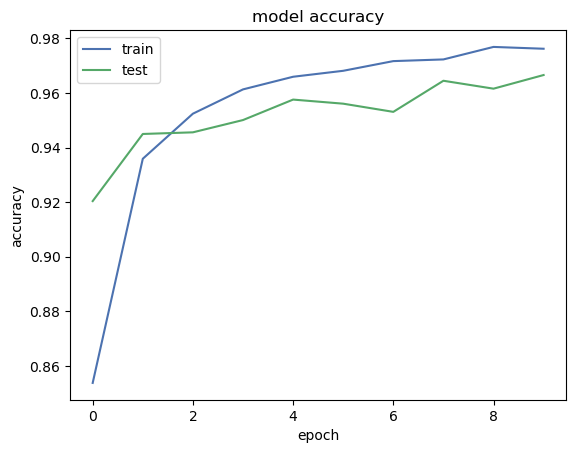

In [30]:
#The resulting plot provides a visual representation of how the training and validation accuracies change over the epochs.
#you want to see both training and validation accuracy indicating good model performance.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()


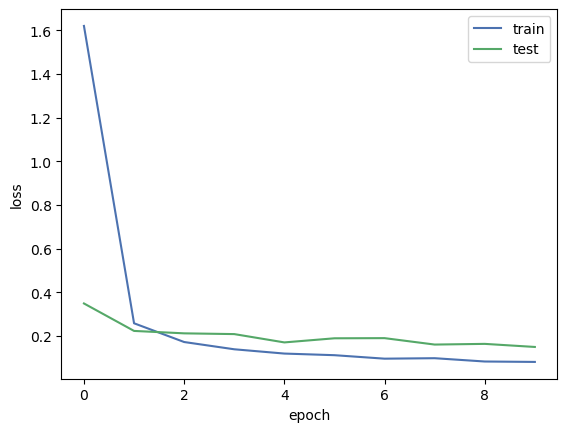

In [31]:
# The code creates a line plot of the training and validation loss over the training epochs of your neural network model.
# Monitoring the loss can help you assess the model's convergence indicating that the model is learning performance.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [32]:
#It used to make predictions on a single test sample and then extract the predicted class label. 
#You can then compare the predicted label to the true label to assess the models performance for this particular sample.
y_predict_single=model.predict(x_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single,axis=1)
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [33]:
y_predict_single[0]

array([9.4472054e-13, 9.9999130e-01, 7.8078067e-08, 6.7773193e-08,
       1.1474490e-03, 3.4272409e-07, 1.3720423e-02, 1.8868324e-05,
       4.9680322e-05, 2.7147054e-16], dtype=float32)

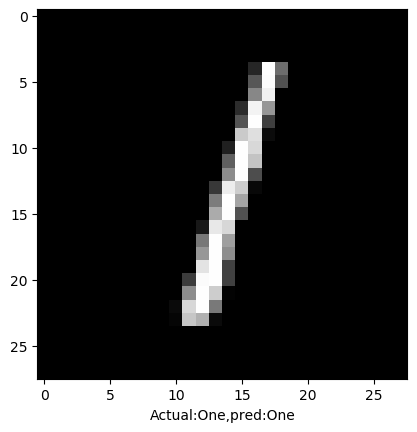

In [34]:
#To display an individual test sample from the MNIST dataset along with its true and predicted labels.
#This code is a visual representation of the models prediction for a single test sample and can be helpful for inspecting how well the model is performing on individual examples.

col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

plt.imshow(x_test_digit[2].reshape(28,28),cmap='gray')
plt.xlabel('Actual:{},pred:{}'.format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [35]:
# It represents the actual or true class label for the digit in the test dataset at index 8.
y_test_digit[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)